<a href="https://colab.research.google.com/github/vemularoshan/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

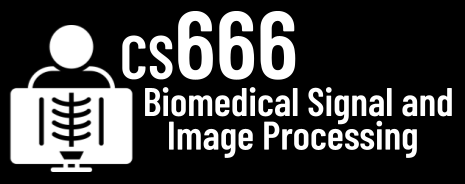

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [3]:
from biosppy import storage
from biosppy.signals import ecg
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [4]:
SAMPLING_RATE = metadata['sampling_rate'] ### TODO!
SECONDS = len(signal)-1/SAMPLING_RATE ### TODO!
print(SAMPLING_RATE, SECONDS)

1000.0 14999.999


**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [5]:
# DOCUMENTATION REFERENCE: https://biosppy.readthedocs.io/en/stable/tutorial.html?highlight=ecg.ecg#signal-processing
#USING ecg.ecg method from the BioSPPY documentation
output = ecg.ecg(signal=signal, sampling_rate=1000, show=False)


**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

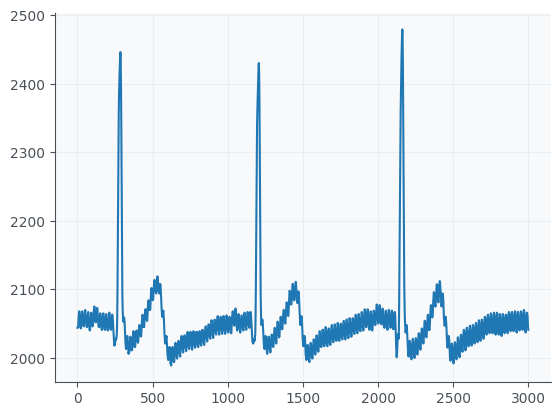

In [6]:
#PLOTTING THE UNFILTERED SIGNAL, FIRST 3 SECONDS

plt.plot(signal[0:int(3 * SAMPLING_RATE)])

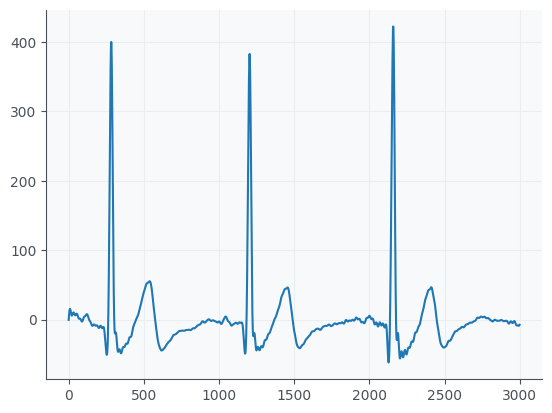

In [7]:
#PLOTTING THE FILTERED SIGNAL

filtered_array = output['filtered']
plt.plot(filtered_array[0:int(3 * SAMPLING_RATE)])


**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

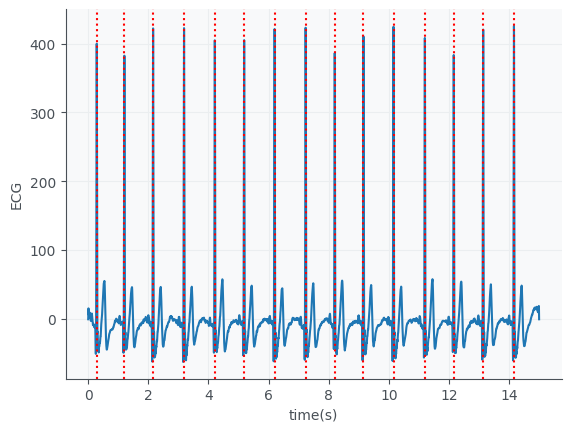

In [8]:
#MARKING R PEAKS WITH THE VERTICAL LINES
t = np.arange(len(filtered_array)) / SAMPLING_RATE
plt.plot(t, filtered_array)
plt.xlabel("time(s)")
plt.ylabel("ECG")

rpeaks_biosppy = output['rpeaks']
for r_peak in rpeaks_biosppy:
    plt.axvline(x=r_peak/SAMPLING_RATE, color='r', ls=':')


plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [9]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [10]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

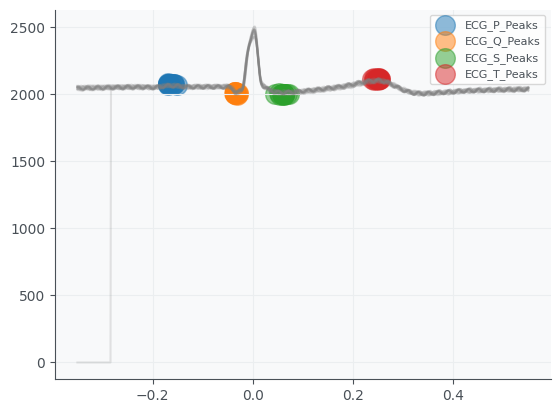

In [11]:
#DETECTING USING nk.ecg_delineate
#DOCUMENTATION REFERENCE: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html

_,peaks = nk.ecg_delineate(signal, rpeaks_biosppy, 1000, method="peak", show=True, show_type='peaks')



**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

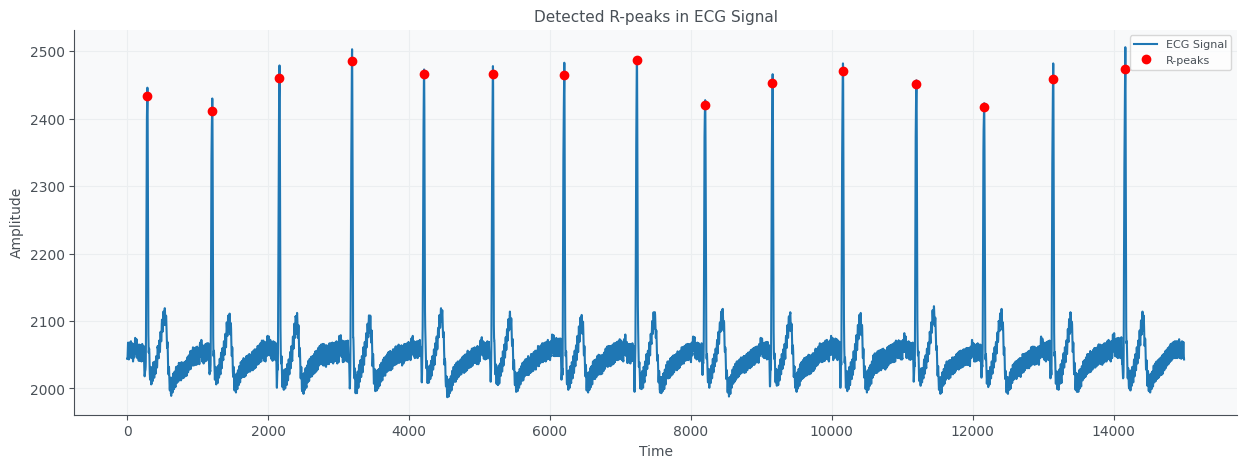

In [13]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/
!pip install sleepecg

from sleepecg import detect_heartbeats

rpeaks_sleepecg = detect_heartbeats(signal,SAMPLING_RATE)
plt.figure(figsize=(15, 5))
plt.plot(signal, label='ECG Signal')
plt.plot(rpeaks_sleepecg, signal[rpeaks_sleepecg], 'ro', label='R-peaks')
plt.title('Detected R-peaks in ECG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [14]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(rpeaks_biosppy,rpeaks_sleepecg)

Biosppy and sleepec rpeaks have negilible difference due to mse 0.2

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [ ]:
# TODO Which one works the best?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#